---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

In [1]:
import numpy as np
import pandas as pd

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

#### 计算过程

##### Energy

In [2]:
# 读取文件时：
# 1) Exclude the footer and header information from the datafile.
energy = pd.read_excel('Energy Indicators.xls', header = None, skipfooter = 1)
energy.head(2)

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Environmental Indicators: Energy,NaN,NaN,NaN


In [3]:
# 2) 数据内容从第 19 行开始，到第 245 行结束。因为程序 index 从 0 开始，所以是 19-1=18 开始。
energy = energy.iloc[18:245, :]
energy.head()

,0,1,2,3,4,5
18,NaN,Afghanistan,Afghanistan,321,10,78.6693
19,NaN,Albania,Albania,102,35,100
20,NaN,Algeria,Algeria,1959,51,0.55101
21,NaN,American Samoa,American Samoa,...,...,0.641026
22,NaN,Andorra,Andorra,9,121,88.6957


In [4]:
# 3) Get rid of the first two unnecessary columns
energy = energy.iloc[:,2:]
energy.head(2)

,2,3,4,5
18,Afghanistan,321,10,78.6693
19,Albania,102,35,100


In [5]:
# 4) change the column labels to: ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.head(2)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
18,Afghanistan,321,10,78.6693
19,Albania,102,35,100


In [6]:
# 5) Use np.NaN to replace the missing data "..." for all countries (必须在 step 6 之前完成，不然 '...' 会复制 1M 遍)
energy.replace('...', np.nan, inplace = True)
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
18,Afghanistan,321.0,10.0,78.669280
19,Albania,102.0,35.0,100.000000
20,Algeria,1959.0,51.0,0.551010
21,American Samoa,NaN,NaN,0.641026
22,Andorra,9.0,121.0,88.695650


In [7]:
# 6) Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
energy['Energy Supply'] = energy['Energy Supply'] * 1000000
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
18,Afghanistan,3.210000e+08,10.0,78.669280
19,Albania,1.020000e+08,35.0,100.000000
20,Algeria,1.959000e+09,51.0,0.551010
21,American Samoa,NaN,NaN,0.641026
22,Andorra,9.000000e+06,121.0,88.695650


`str.find('xx')` 如果没有找到 'xx'，则会返回 index = -1。如果找到，则返回正数 index。

In [8]:
#for data in energy['Country']:
    # 7) Remove numbers in the countries name -滤遍每个字节，only collect not digit char and concate them finally
    #ctry1 = ''.join([i for i in data if not i.isdigit()])
    #print(ctry1) 
    # 8) Remove parenthesis in the countries name - 去掉从第一个 '(' 之后的所有内容
    #if ctry1.find('(') > -1:
        #ctry1 = ctry1[:ctry1.find('(')]
    #print(ctry1)    
    # 9) Remove leading and trailing whitespaces
    #ctry3 = ctry1.strip()
    #print(ctry3) 

In [9]:
# 将上述计算写成 Function
def remove_num_par(data):
    # 7) Remove numbers in the countries name -滤遍每个字节，only collect not digit char and concate them finally
    ctry = ''.join([i for i in data if not i.isdigit()])
    # 8) Remove parenthesis in the countries name - 去掉从第一个 '(' 之后的所有内容
    if ctry.find('(') > -1:
        ctry = ctry[:ctry.find('(')]
    # 9) Remove leading and trailing whitespaces
    return ctry.strip()

In [10]:
energy['Country'] = energy['Country'].apply(remove_num_par)
energy['Country']

18                   Afghanistan
19                       Albania
20                       Algeria
21                American Samoa
22                       Andorra
                 ...            
240                     Viet Nam
241    Wallis and Futuna Islands
242                        Yemen
243                       Zambia
244                     Zimbabwe
Name: Country, Length: 227, dtype: object

In [11]:
# 10) Rename the following list of countries (for use in later questions):
# "Republic of Korea": "South Korea",
# "United States of America": "United States",
# "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
# "China, Hong Kong Special Administrative Region": "Hong Kong"
rename_list = {'Republic of Korea': 'South Korea',
               'United States of America': 'United States',
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
               'China, Hong Kong Special Administrative Region': 'Hong Kong'}

energy.replace({'Country': rename_list}, inplace = True)
energy.loc[61, 'Country']

'Hong Kong'

##### World Bank

In [12]:
# 1) 从第 5 行开始，读取数据。因为程序从 index 0 开始，所以 skiprows = 4
GDP = pd.read_csv('world_bank.csv', skiprows = 4)
GDP.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [13]:
# 2) Rename the column "Country Name"
GDP.rename(columns = {'Country Name': 'Country'}, inplace = True)
GDP.head(2)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [14]:
# 3) rename the following list of countries:
# "Korea, Rep.": "South Korea", 
# "Iran, Islamic Rep.": "Iran",
# "Hong Kong SAR, China": "Hong Kong"
rename_list = {"Korea, Rep.": "South Korea", 
               "Iran, Islamic Rep.": "Iran",
               "Hong Kong SAR, China": "Hong Kong"}

GDP.replace({'Country': rename_list}, inplace = True)

#####  Sciamgo Journal

In [15]:
# load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology,
# it ranks countries based on their journal contributions in the aforementioned area. 
# Call this DataFrame ScimEn.
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn.head(2)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.7,138
1,2,United States,96661,94747,792274,265436,8.2,230


##### Join the three datasets: GDP, Energy, and ScimEn into a new dataset

In [16]:
# 1) Join the three datasets: GDP, Energy, and ScimEn into a new dataset
GDP_Energy = pd.merge(GDP, energy, on = 'Country')
df = pd.merge(GDP_Energy, ScimEn, on = 'Country')
df.head(2)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9000000.0,121.0,88.69565,168,2,2,13,0,6.5,1
1,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,321000000.0,10.0,78.66928,163,3,3,0,0,0.0,0


In [17]:
# 2) The index of this DataFrame should be the name of the country
df.set_index('Country', inplace = True)
df.head(2)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,,
Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9000000.0,121.0,88.69565,168,2,2,13,0,6.5,1
Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,321000000.0,10.0,78.66928,163,3,3,0,0,0.0,0


In [18]:
# 3) Rebuild the columns
col = ['Rank', 'Documents', 'Citable documents', 'Citations', 
       'Self-citations', 'Citations per document', 'H index', 
       'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
       '2013', '2014', '2015']

df = df[col]
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Andorra,168,2,2,13,0,6.5,1,9000000.0,121.0,88.69565,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,163,3,3,0,0,0.0,0,321000000.0,10.0,78.66928,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10


In [19]:
# for Question 2
df_len = len(df)

In [20]:
# 4) only the top 15 countries by Scimagojr 'Rank'
df = df[df['Rank'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])]
df.sort_values(by=['Rank'], inplace=True)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


#### YC 答案

In [21]:
def answer_one():
    # ============Energy Begin==============
    # 1) Exclude the footer and header information from the datafile.
    energy = pd.read_excel('Energy Indicators.xls', header = None, skipfooter = 1)
    # 2) 数据内容从第 19 行开始，到第 245 行结束。因为程序 index 从 0 开始，所以是 19-1=18 开始。
    energy = energy.iloc[18:245, :]
    # 3) Get rid of the first two unnecessary columns
    energy = energy.iloc[:,2:]
    # 4) change the column labels to: ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # 5) Use np.NaN to replace the missing data "..." for all countries (必须在 step 6 之前完成，不然 '...' 会复制 1M 遍)
    energy.replace('...', np.nan, inplace = True)
    # 6) Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    
    def remove_num_par(data):
        # 7) Remove numbers in the countries name -滤遍每个字节，only collect not digit char and concate them finally
        ctry = ''.join([i for i in data if not i.isdigit()])
        # 8) Remove parenthesis in the countries name - 去掉从第一个 '(' 之后的所有内容
        if ctry.find('(') > -1:
            ctry = ctry[:ctry.find('(')]
        # 9) Remove leading and trailing whitespaces
        return ctry.strip()

    energy['Country'] = energy['Country'].apply(remove_num_par)
    # 10) Rename the following list of countries (for use in later questions):
    # "Republic of Korea": "South Korea",
    # "United States of America": "United States",
    # "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    # "China, Hong Kong Special Administrative Region": "Hong Kong"
    rename_list = {'Republic of Korea': 'South Korea',
                   'United States of America': 'United States',
                   'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                   'China, Hong Kong Special Administrative Region': 'Hong Kong'}
    energy.replace({'Country': rename_list}, inplace = True)
    # ============Energy End==============
    
    # ============World Bank Begin=============
    # 1) 从第 5 行开始，读取数据。因为程序从 index 0 开始，所以 skiprows = 4
    GDP = pd.read_csv('world_bank.csv', skiprows = 4)
    # 2) Rename the column "Country Name"
    GDP.rename(columns = {'Country Name': 'Country'}, inplace = True)
    # 3) rename the following list of countries:
    # "Korea, Rep.": "South Korea", 
    # "Iran, Islamic Rep.": "Iran",
    # "Hong Kong SAR, China": "Hong Kong"
    rename_list = {"Korea, Rep.": "South Korea", 
                   "Iran, Islamic Rep.": "Iran",
                   "Hong Kong SAR, China": "Hong Kong"}

    GDP.replace({'Country': rename_list}, inplace = True)
    # ============World Bank End=============
    
    # ============Sciamgo Journal Begin=============
    # load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology,
    # it ranks countries based on their journal contributions in the aforementioned area. 
    # Call this DataFrame ScimEn.
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    # ============Sciamgo Journal End=============
    
    # ====Join the three datasets: GDP, Energy, and ScimEn Begin====
    # 1) Join the three datasets: GDP, Energy, and ScimEn into a new dataset
    GDP_Energy = pd.merge(GDP, energy, on = 'Country')
    df = pd.merge(GDP_Energy, ScimEn, on = 'Country')
    # 2) The index of this DataFrame should be the name of the country
    df.set_index('Country', inplace = True)
    # 3) Rebuild the columns
    col = ['Rank', 'Documents', 'Citable documents', 'Citations', 
           'Self-citations', 'Citations per document', 'H index', 
           'Energy Supply', 'Energy Supply per Capita', '% Renewable', 
           '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
           '2013', '2014', '2015']

    df = df[col]
    # 4) only the top 15 countries by Scimagojr 'Rank'
    df = df[df['Rank'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])]
    df.sort_values(by=['Rank'], inplace=True)
    # ====Join the three datasets: GDP, Energy, and ScimEn End====
    
    return df

In [22]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


#### 标准答案

In [23]:
#def answer_one():
#    energy = pd.read_excel('Energy Indicators.xls')
#    energy = energy[16:243]
#    energy = energy.drop(energy.columns[[0, 1]], axis=1)
#    energy.rename(columns={'Environmental Indicators: Energy': 'Country','Unnamed: 3':'Energy Supply','Unnamed: 4':'Energy Supply per Capita','Unnamed: 5':'% Renewable'}, inplace=True)
#    energy.replace('...', np.nan,inplace = True)
#    energy['Energy Supply'] *= 1000000
#    def remove_digit(data):
#        newData = ''.join([i for i in data if not i.isdigit()])
#        i = newData.find('(')
#        if i>-1: newData = newData[:i]
#        return newData.strip()
#    energy['Country'] = energy['Country'].apply(remove_digit)
#    di = {"Republic of Korea": "South Korea",
#    "United States of America": "United States",
#    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
#    "China, Hong Kong Special Administrative Region": "Hong Kong"}
#    energy.replace({"Country": di},inplace = True)
#    #energy


#    # In[275]:

#    GDP = pd.read_csv('world_bank.csv', skiprows=4)
#    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
#    di = {"Korea, Rep.": "South Korea", 
#    "Iran, Islamic Rep.": "Iran",
#    "Hong Kong SAR, China": "Hong Kong"}
#    GDP.replace({"Country": di},inplace = True)
#    #GDP


#    # In[113]:

#    ScimEn = pd.read_excel('scimagojr-3.xlsx')
#    df = pd.merge(pd.merge(energy, GDP, on='Country'), ScimEn, on='Country')

#    # We only need 2006-2015 data
#    df.set_index('Country',inplace=True)
#    df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#    df = (df.loc[df['Rank'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])])
#    df.sort('Rank',inplace=True)

    
#    return df

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [24]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

#### 计算过程

∣A ∪ B ∪ C∣ = ∣A∣ + ∣B∣ + ∣C∣ - ∣A ∩ B∣ - ∣A ∩ C∣ - ∣B ∩ C∣ + ∣A ∩ B ∩ C∣

In [25]:
GDP_Scim = pd.merge(GDP, ScimEn, on = 'Country')

In [26]:
Energy_Scim = pd.merge(energy, ScimEn, on = 'Country')

In [27]:
# 合并后剩下行数
df_len

162

In [28]:
# 3 组 DataFrame 不重复的情况下，总行数
len(energy) + len(GDP) + len(ScimEn) - len(GDP_Energy) - len(Energy_Scim) - len(GDP_Scim) + len(Energy_Scim)

330

In [29]:
# 消失的行数
318 - 162

156

#### YC 答案

In [30]:
def answer_two():
    return 156

#### 标准答案

In [31]:
def answer_two():
    return 156

<br>

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

#### 计算过程

In [48]:
df = answer_one()
df.head(1)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12


In [54]:
# 计算 10 年平均 GDP
last10yr = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
# 默认的 mean() 计算列的平均值
avgGDP = df[last10yr].mean(axis=1)
avgGDP.head(2)

Country
China            6.348609e+12
United States    1.536434e+13
dtype: float64

In [61]:
# average GDP sorted in descending order
avgGDP.sort_values(ascending = False, inplace = True)
avgGDP.columns = ['avgGDP']
avgGDP.head(2)

Country
United States    1.536434e+13
China            6.348609e+12
Name: avgGDP, dtype: float64

#### YC 答案

In [ ]:
def answer_three():
    df = answer_one()
    # 计算 10 年平均 GDP
    last10yr = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    # 默认的 mean() 计算列的平均值
    avgGDP = df[last10yr].mean(axis=1)
    # average GDP sorted in descending order
    avgGDP.sort_values(ascending = False, inplace = True)
    # return a Series named avgGDP
    avgGDP.columns = ['avgGDP']
    return avgGDP

#### 标准答案

In [33]:
def answer_three():
    Top15 = answer_one()
    avgGDP = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014',
                    '2015']].mean(axis=1).sort_values(ascending = False)
    avgGDP.rename('avgGDP',inplace=True)
    return avgGDP

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

#### 计算过程

In [67]:
df = answer_one()
avgGDP = answer_three()
# the country with the 6th largest average GDP
country_6th = avgGDP.index[5]
df.loc[country_6th, '2015'] - df.loc[country_6th, '2006']

246702696075.3999

#### YC 答案

In [ ]:
def answer_four():
    df = answer_one()
    avgGDP = answer_three()
    # the country with the 6th largest average GDP
    country_6th = avgGDP.index[5]
    return df.loc[country_6th, '2015'] - df.loc[country_6th, '2006']

#### 标准答案

In [34]:
def answer_four():
    Top15 = answer_one()
    avgGDP = answer_three()
    avgGDP_6th = avgGDP.index[5]
    
    return Top15.loc[avgGDP_6th,'2015'] - Top15.loc[avgGDP_6th,'2006']

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

#### 计算过程

In [69]:
df = answer_one()
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


In [70]:
df['Energy Supply per Capita'].mean()

157.6

#### YC 答案

In [72]:
def answer_five():
    df = answer_one()
    return df['Energy Supply per Capita'].mean()

#### 标准答案

In [35]:
def answer_five():
    Top15 = answer_one()
    return Top15['Energy Supply per Capita'].mean()

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

#### 计算过程

In [74]:
df = answer_one()
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


In [76]:
max_renew = (df['% Renewable'].idxmax(), df['% Renewable'].max())
max_renew

('Brazil', 69.64803)

#### YC 答案

In [ ]:
def answer_six():
    df = answer_one()
    return (df['% Renewable'].idxmax(), df['% Renewable'].max())

#### 标准答案

In [36]:
def answer_six():
    Top15 = answer_one()
    return (Top15['% Renewable'].idxmax(1),Top15.loc[Top15['% Renewable'].idxmax(1),'% Renewable'])

In [77]:
answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

#### 计算过程

In [78]:
df = answer_one()
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


In [79]:
# Create a new column that is the ratio of Self-Citations to Total Citations
df['Citations_ratio'] = df['Self-citations'] / df['Citations']
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Citations_ratio
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031


In [80]:
# The maximum value for the new column, and what country has the highest ratio
max_citations_rt = (df['Citations_ratio'].idxmax(), df['Citations_ratio'].max())
max_citations_rt

('China', 0.6893126179389422)

#### YC 答案

In [82]:
def answer_seven():
    df = answer_one()
    # Create a new column that is the ratio of Self-Citations to Total Citations
    df['Citations_ratio'] = df['Self-citations'] / df['Citations']
    return (df['Citations_ratio'].idxmax(), df['Citations_ratio'].max())

#### 标准答案

In [83]:
def answer_seven():
    Top15 = answer_one()
    Top15['Citations_ratio'] = Top15['Self-citations'] / Top15['Citations']
    return (Top15['Citations_ratio'].idxmax(1),
            Top15.loc[Top15['Citations_ratio'].idxmax(1),'Citations_ratio'])

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

#### 计算过程

In [84]:
df = answer_one()
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


In [85]:
# Create a column that estimates the population using Energy Supply and Energy Supply per capita
df['Est Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
pop = df['Est Population'].sort_values(ascending = False)
pop.head()

Country
China                 1.367645e+09
India                 1.276731e+09
United States         3.176154e+08
Brazil                2.059153e+08
Russian Federation    1.435000e+08
Name: Est Population, dtype: float64

In [86]:
# The third most populous country
pop.index[2]

'United States'

#### YC 答案

In [ ]:
def answer_eight():
    df = answer_one()
    # Create a column that estimates the population using Energy Supply and Energy Supply per capita
    df['Est Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    pop = df['Est Population'].sort_values(ascending = False)
    # The third most populous country
    return pop.index[2]

In [38]:
def answer_eight():
    Top15 = answer_one()
    Top15['Est Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    return Top15['Est Population'].nlargest(3).index[2]

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

#### 计算过程

In [88]:
df = answer_one()
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


In [89]:
# Estimate the population
df['Est Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
# Create a column that estimates the number of citable documents per person
df['Citable doc per Person'] = df['Citable documents'] / df['Est Population']
df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Est Population,Citable doc per Person
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,0.000093
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08,0.000298


In [93]:
# the correlation between the number of citable documents per capita and the energy supply per capita
# Use the .corr() method, (Pearson's correlation)
df[['Citable doc per Person', 'Energy Supply per Capita']].corr(method = 'pearson').iloc[0,1]

,Citable doc per Person,Energy Supply per Capita
Citable doc per Person,1.000000,0.794001
Energy Supply per Capita,0.794001,1.000000


#### YC 答案

In [ ]:
def answer_nine():
    df = answer_one()
    # Estimate the population
    df['Est Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    # Create a column that estimates the number of citable documents per person
    df['Citable doc per Person'] = df['Citable documents'] / df['Est Population']
    # the correlation between the number of citable documents per capita and the energy supply per capita
    # Use the .corr() method, (Pearson's correlation)
    return df[['Citable doc per Person', 'Energy Supply per Capita']].corr(method = 'pearson').iloc[0,1]

In [39]:
def answer_nine():
    Top15 = answer_one()
    Top15['Est Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable Doc per Person'] = Top15['Citable documents'] / Top15['Est Population']
    return Top15[['Citable Doc per Person','Energy Supply per Capita']].corr(method='pearson').iloc[0,1]


In [40]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

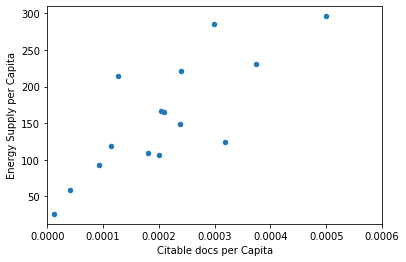

In [94]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [42]:
def answer_ten():
    Top15 = answer_one()
    renew_median = Top15['% Renewable'].median()
    Top15['HighRenew'] = (Top15['% Renewable']>=renew_median)
    return Top15['HighRenew'].rename('HighRenew')

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [43]:
def answer_eleven():
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    
    Top15['Continent'] = None
    for country in Top15.index:
        Top15.loc[country,'Continent'] = ContinentDict[country]
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    #Top15.reset_index(inplace=True)
    #Top15.set_index('Continent',inplace=True)
    
    return Top15.groupby('Continent')['PopEst'].aggregate({'size':np.size,'sum':np.sum,'mean':np.mean,'std':np.std})


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [44]:
def answer_twelve():
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    
    Top15['Continent'] = None
    for country in Top15.index:
        Top15.loc[country,'Continent'] = ContinentDict[country]
    Top15.reset_index(inplace=True)
    Top15.set_index('Continent',inplace=True)
    Top15['Bin Renewable'] = pd.cut(Top15['% Renewable'],5)
    
    return Top15.groupby(['Continent','Bin Renewable']).size()

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [45]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

    return Top15['PopEst'].apply(lambda x: '{:,}'.format(x))

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [46]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [47]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!